<a href="https://colab.research.google.com/github/leonbenenati/Projeto/blob/main/PCA_E_FAMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajustes iniciais 

In [11]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df=df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1)

In [5]:
df['Attrition_Flag']= df['Attrition_Flag'].replace({'Attrited Customer':1,'Existing Customer':0})


In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# EDA

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


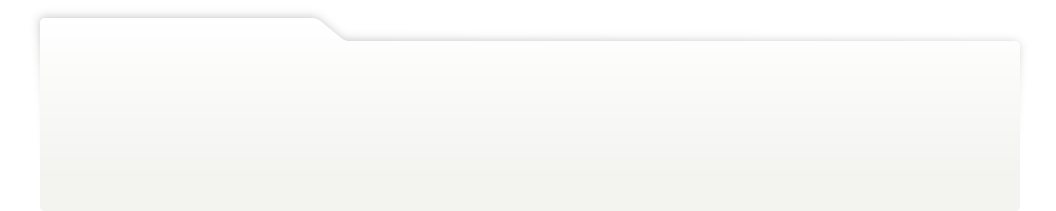
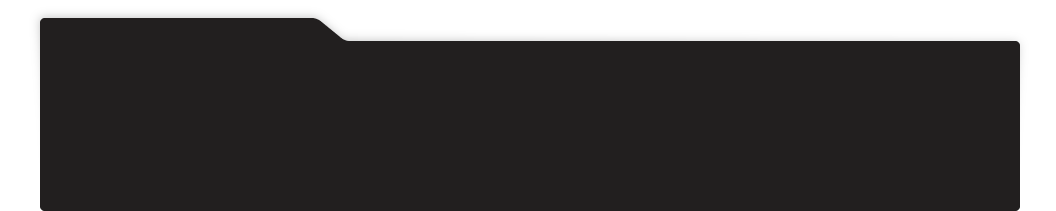
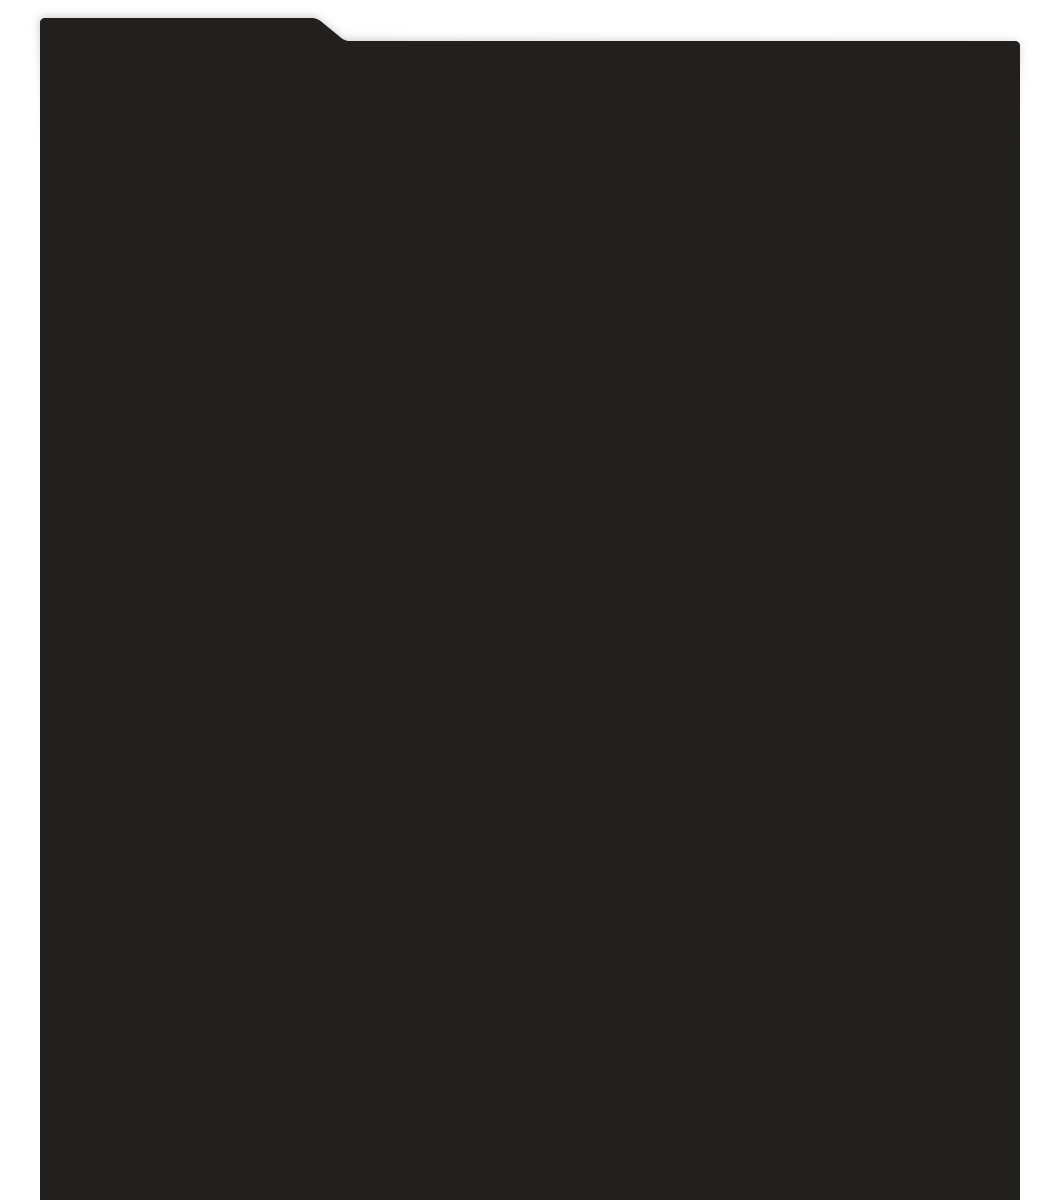
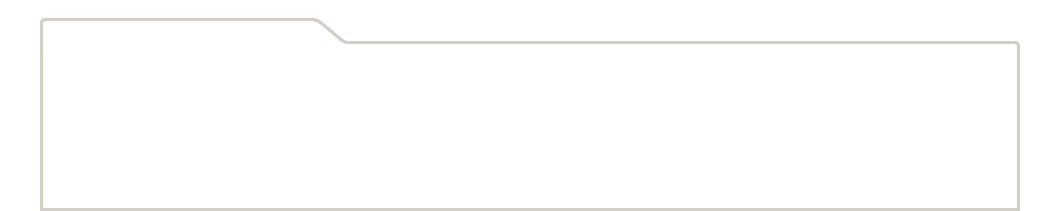
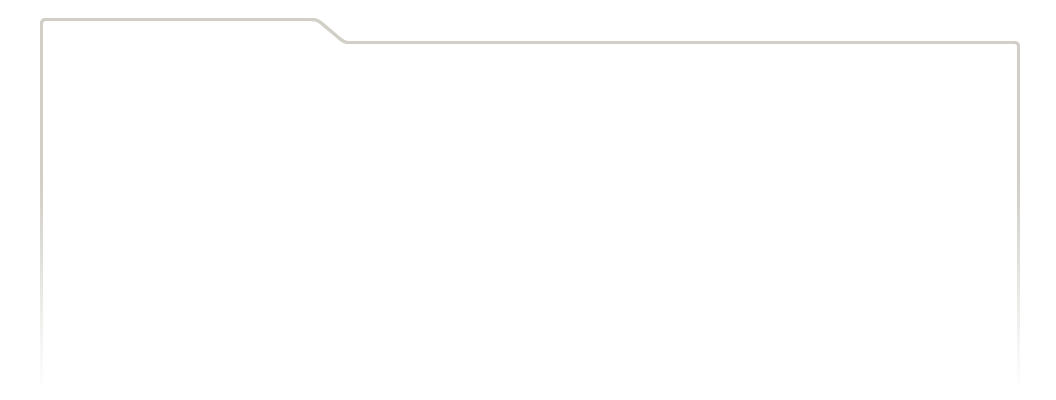
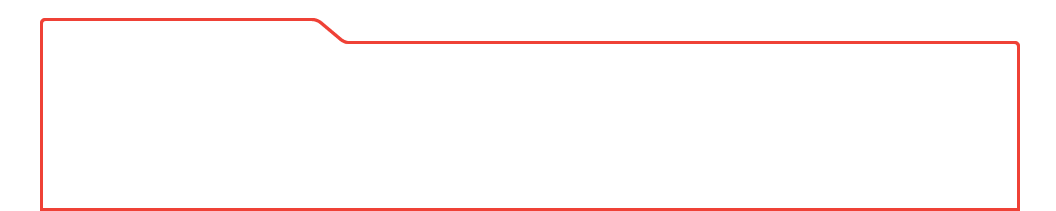
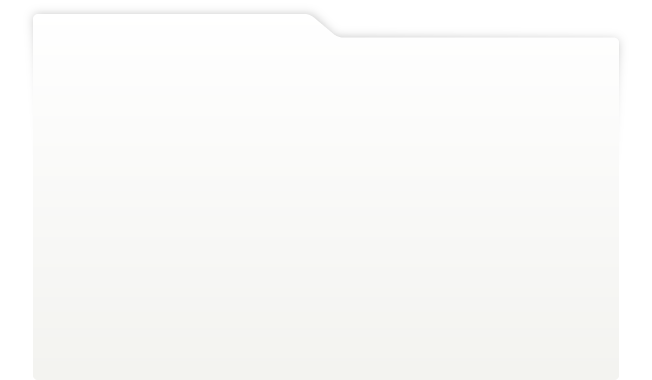
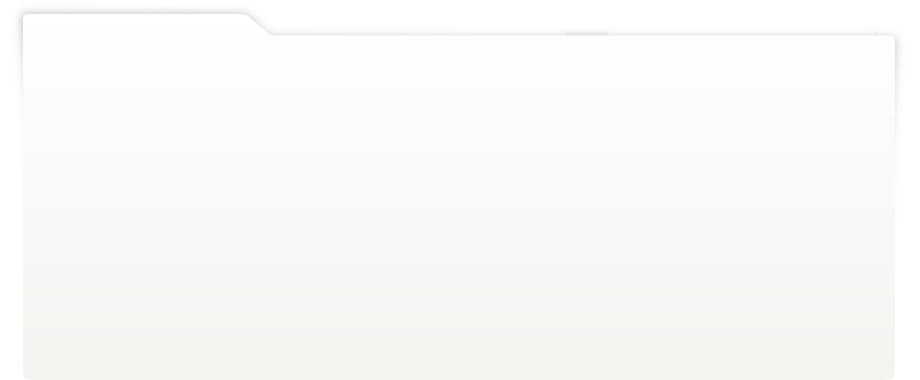
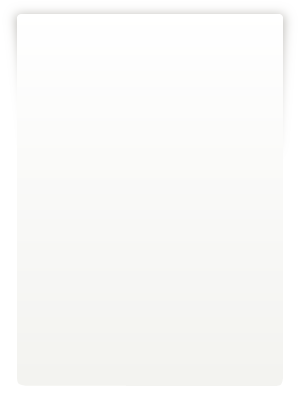
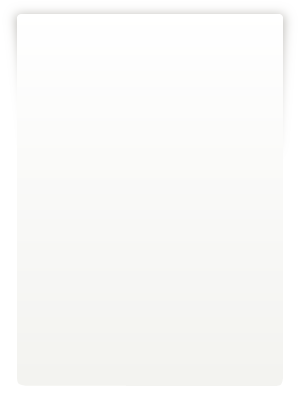
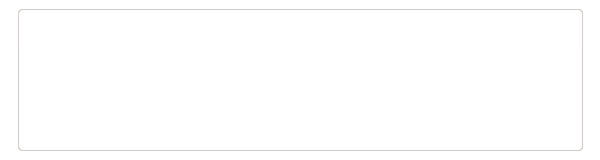
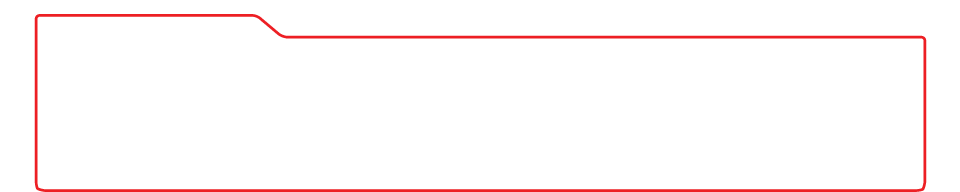
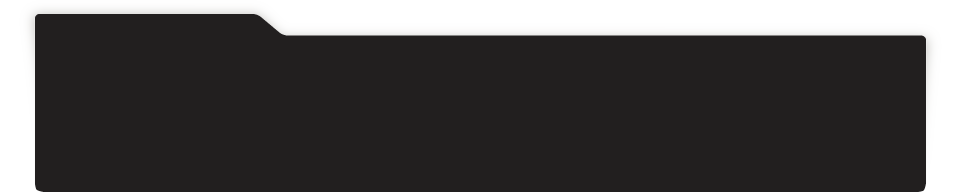
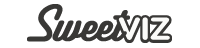
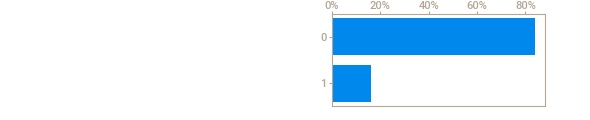
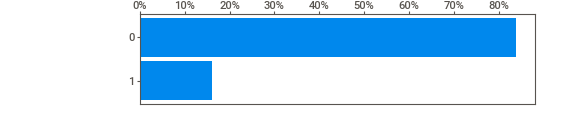
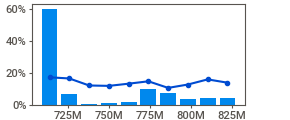
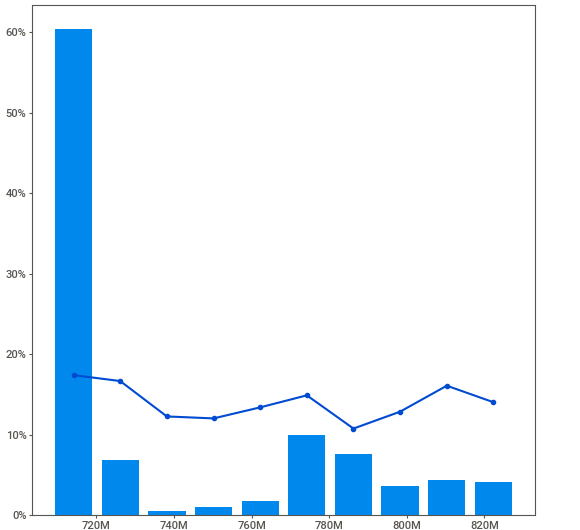
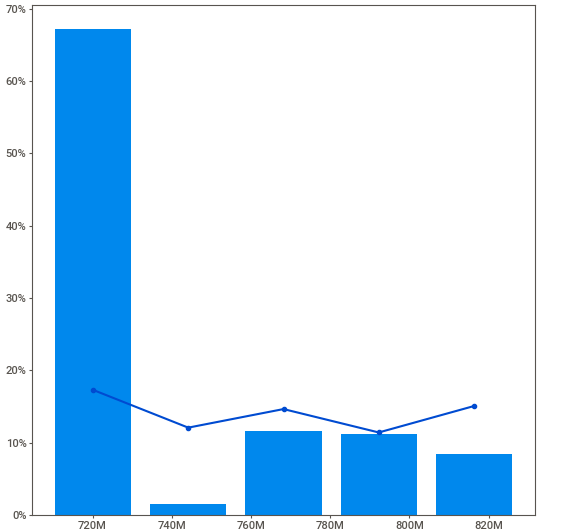
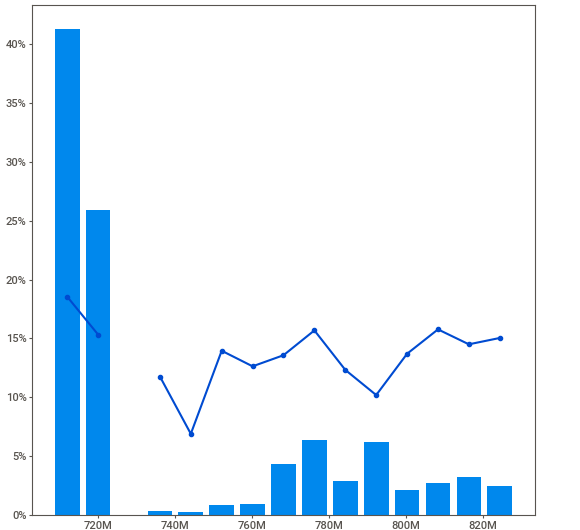
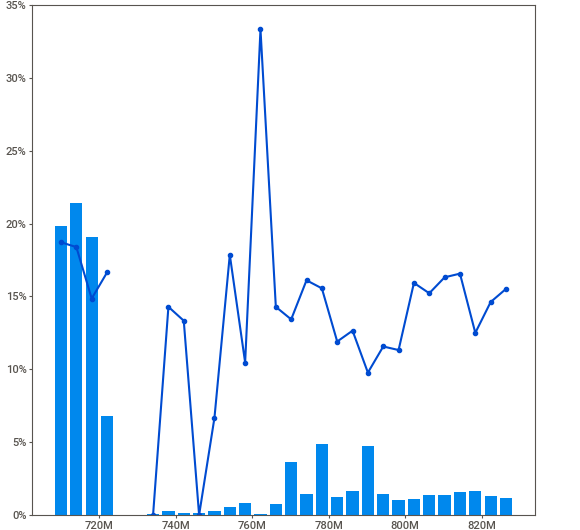
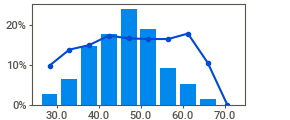
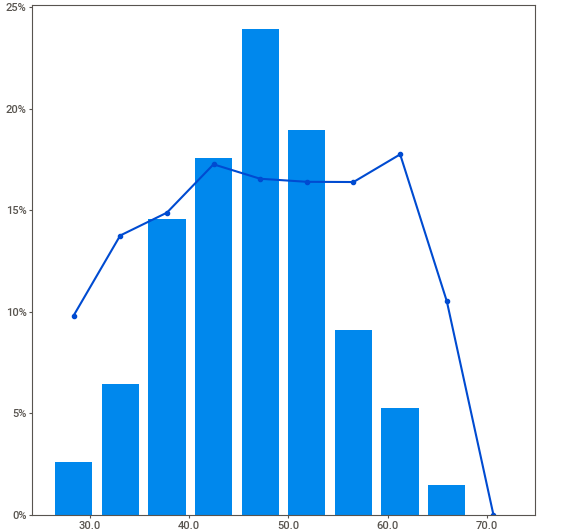
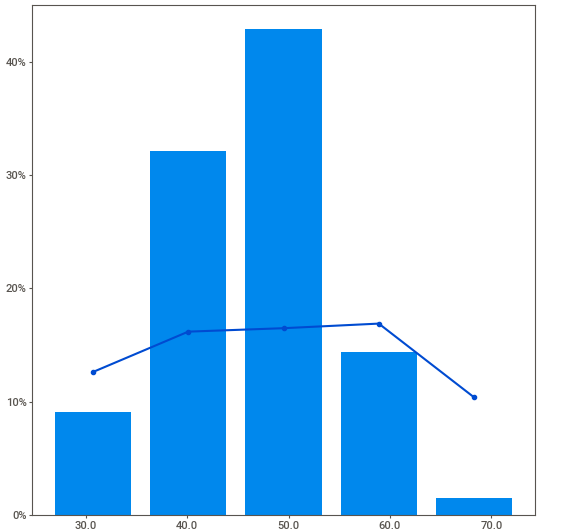
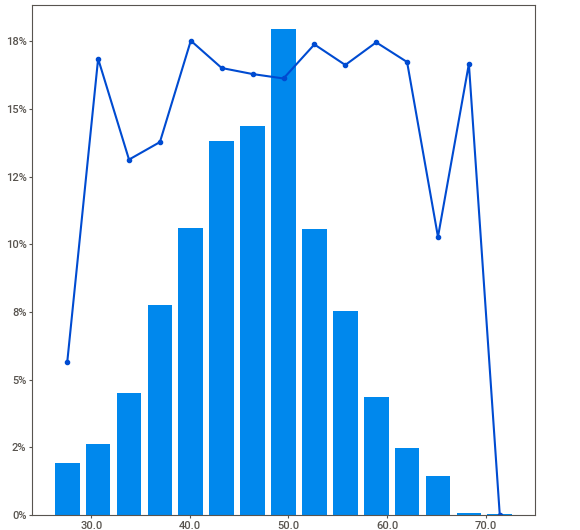
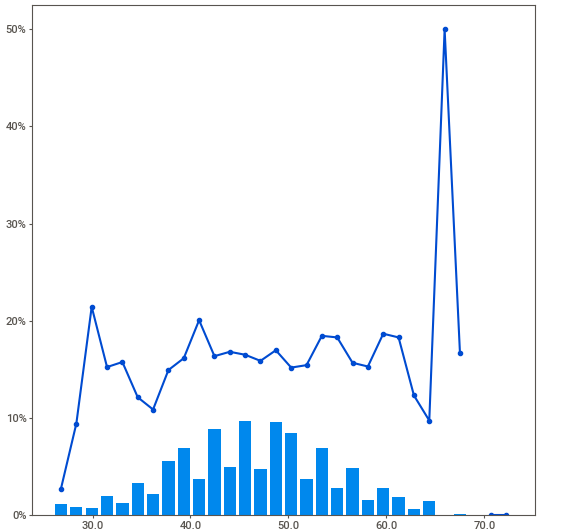
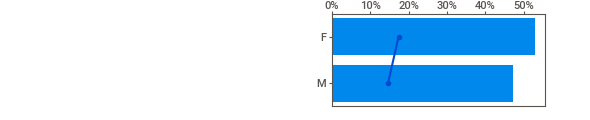
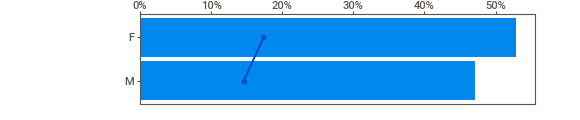
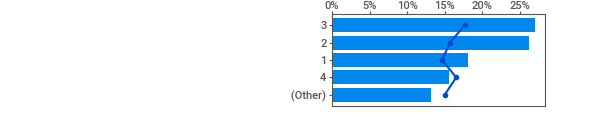
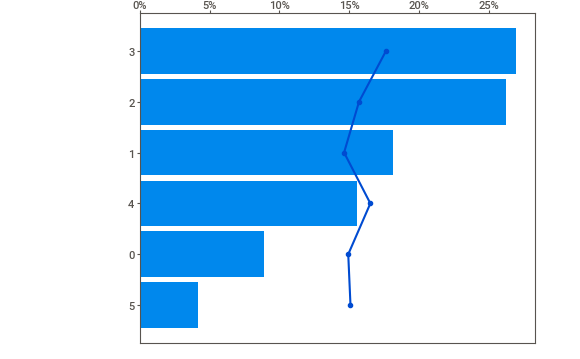
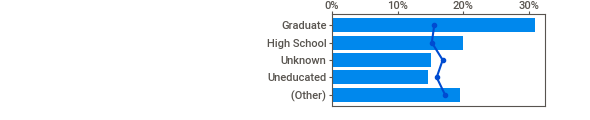
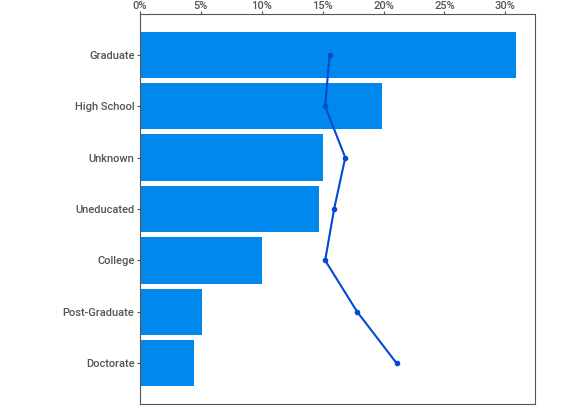
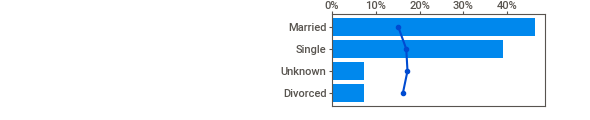
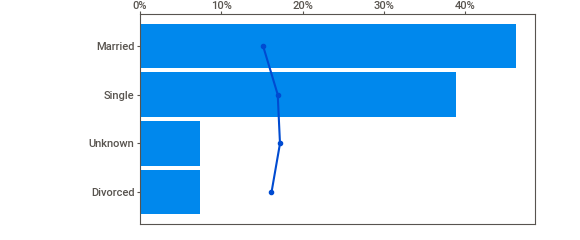
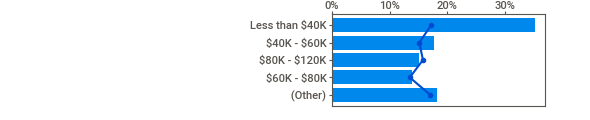
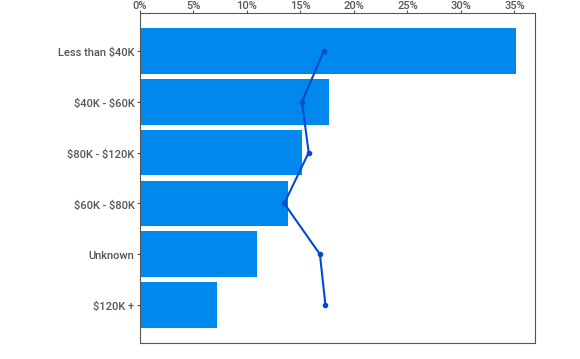
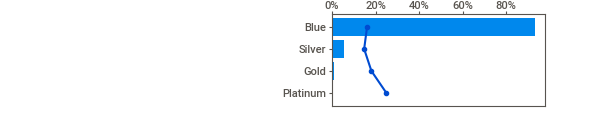
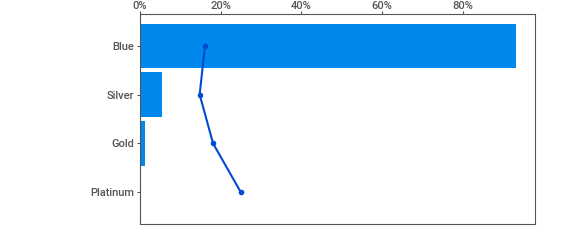
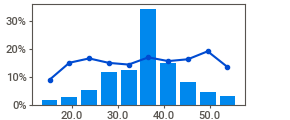
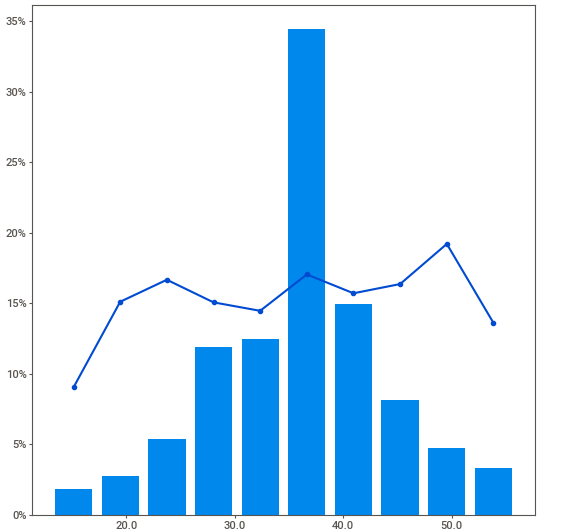
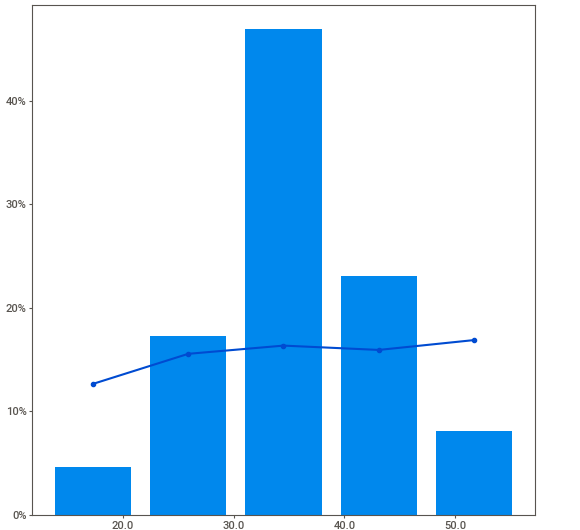
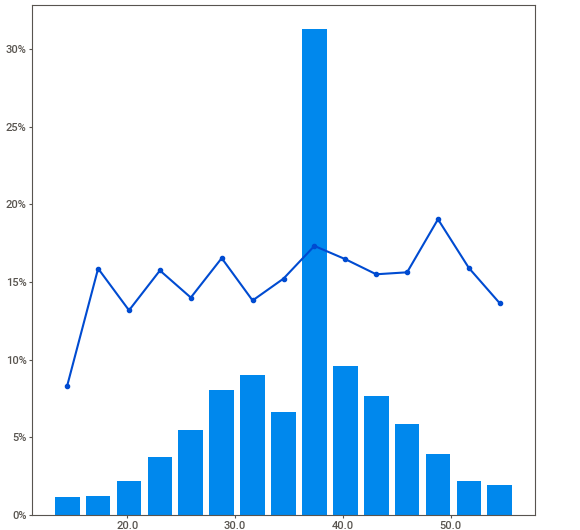
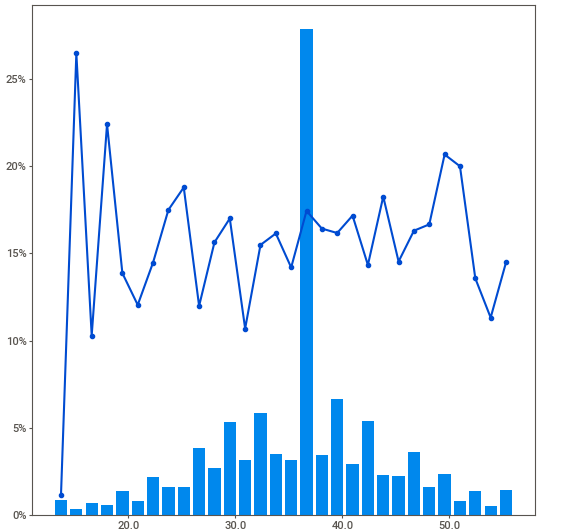
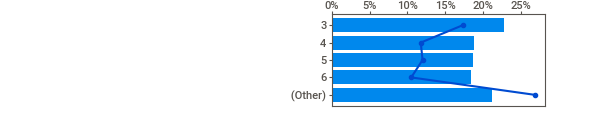
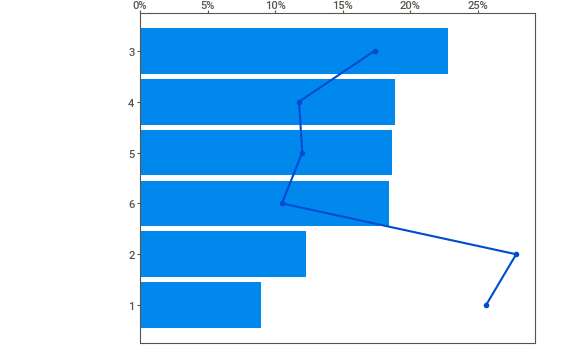
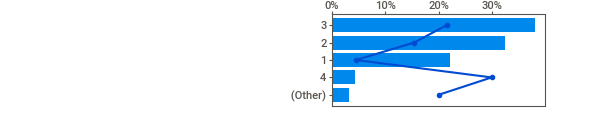
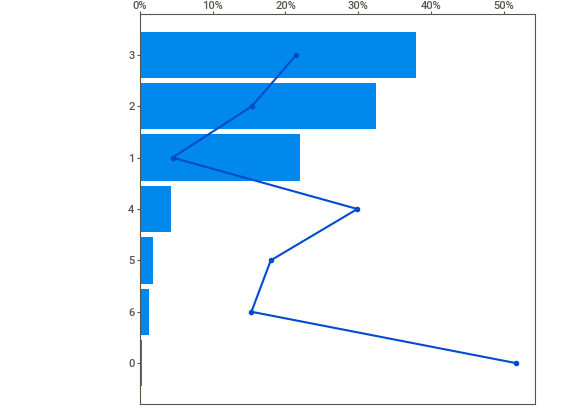
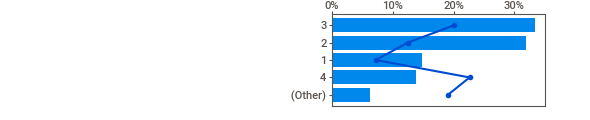
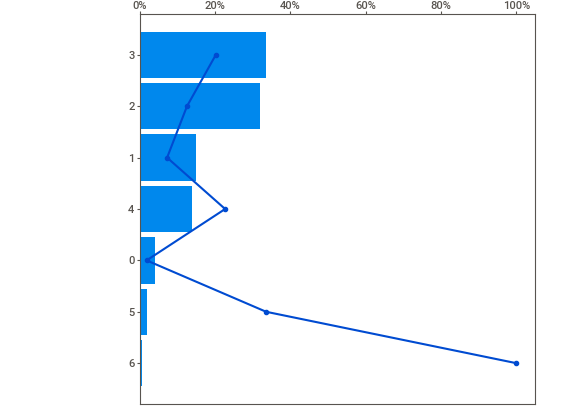
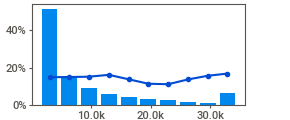
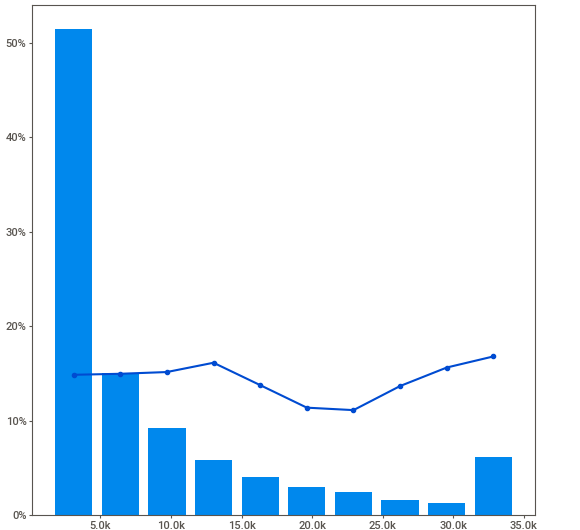
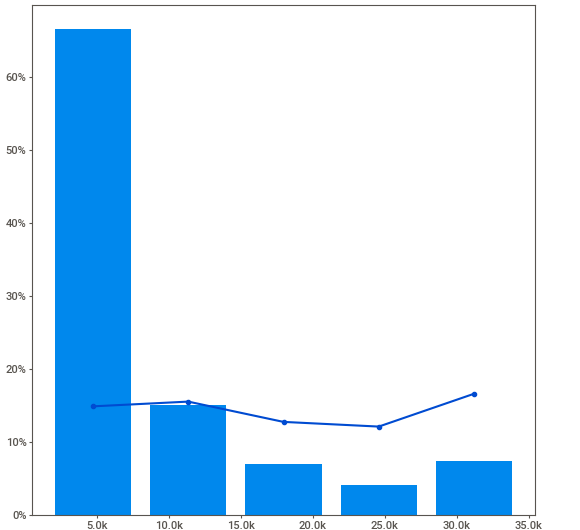
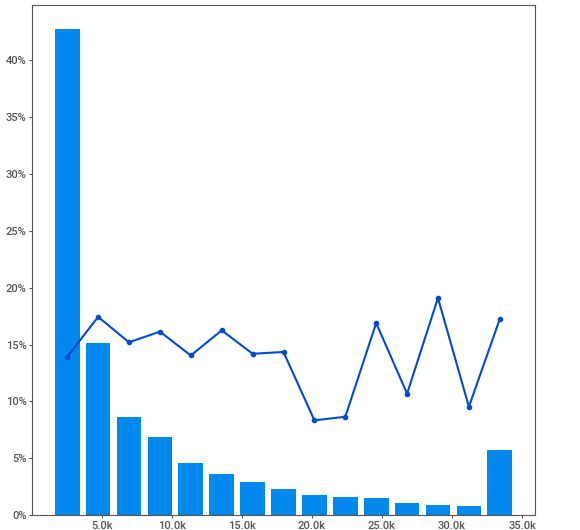
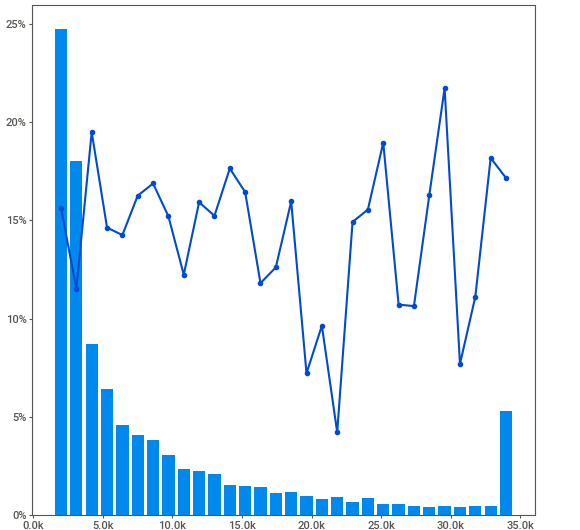
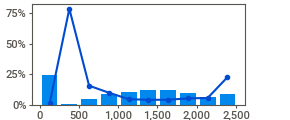
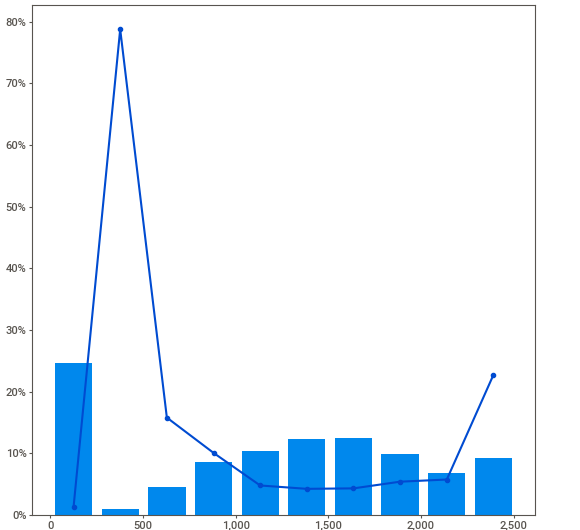
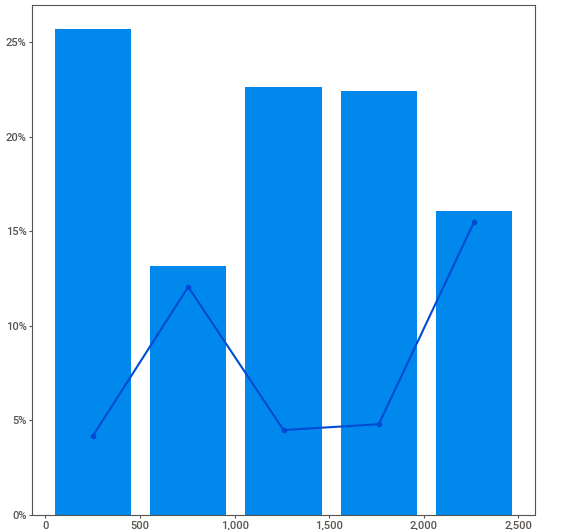
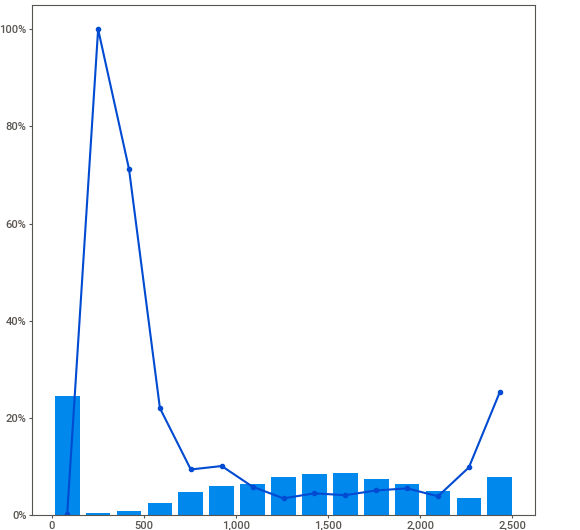
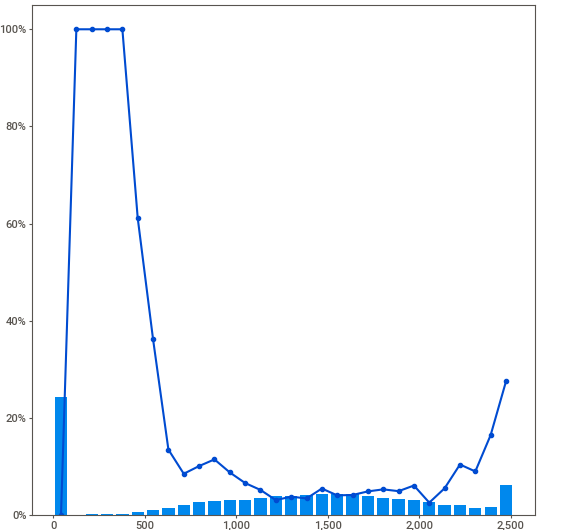
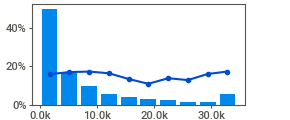
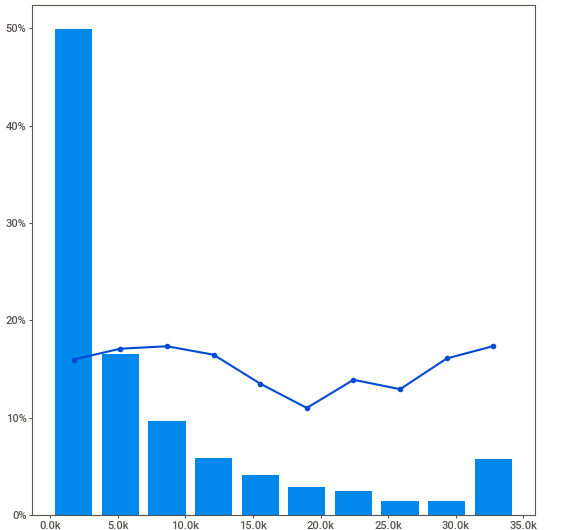
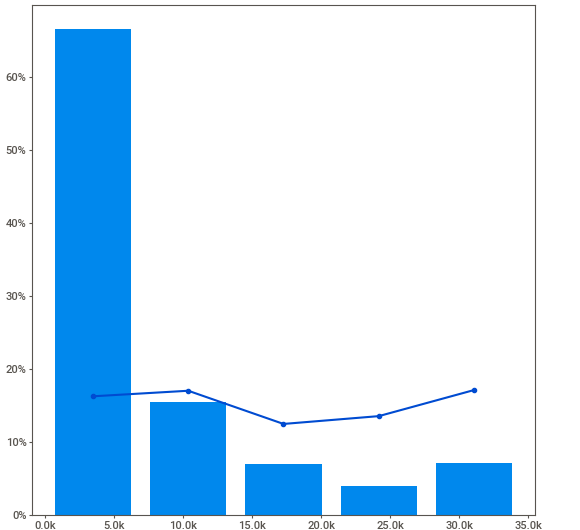
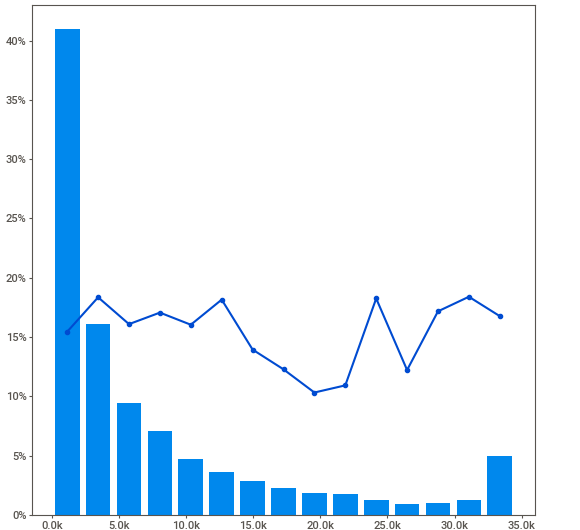
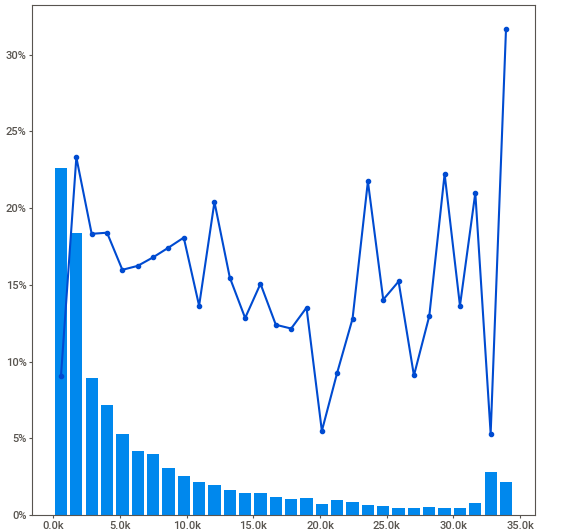
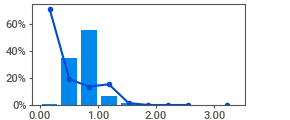
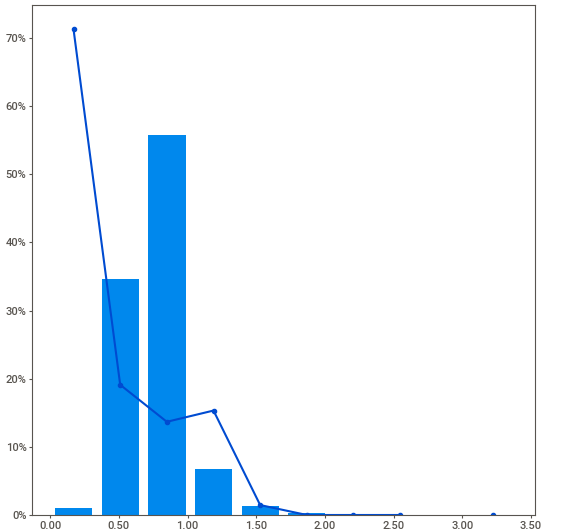
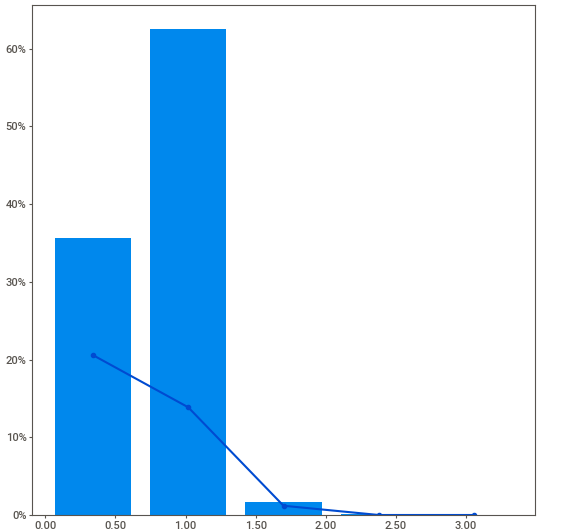
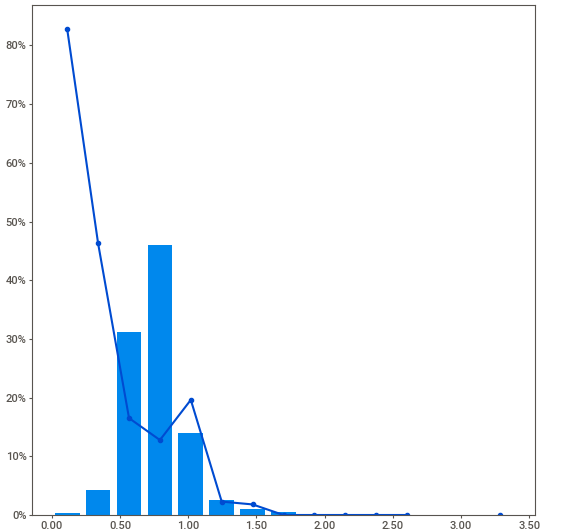
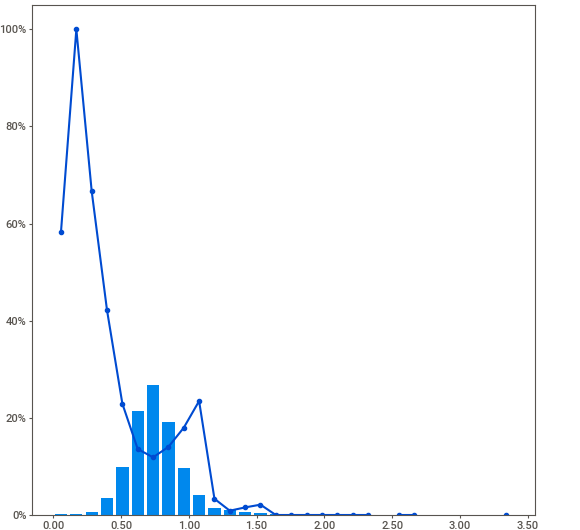
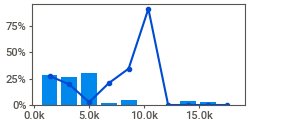
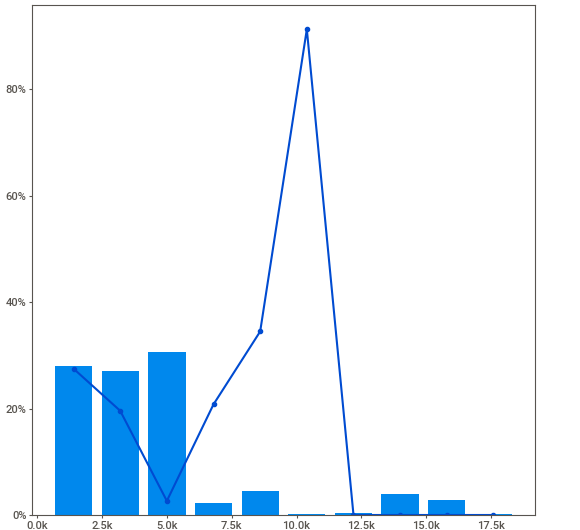
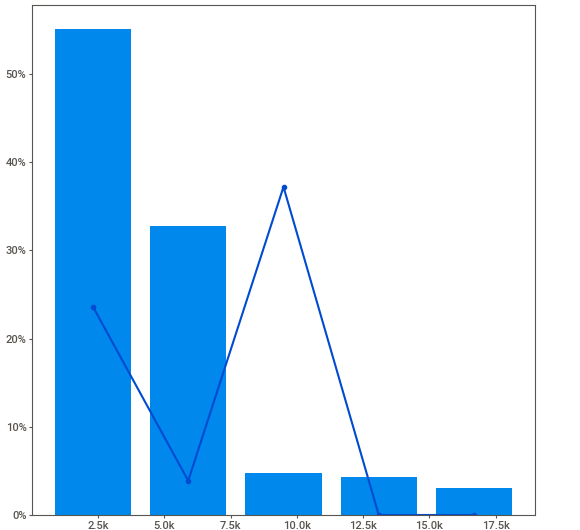
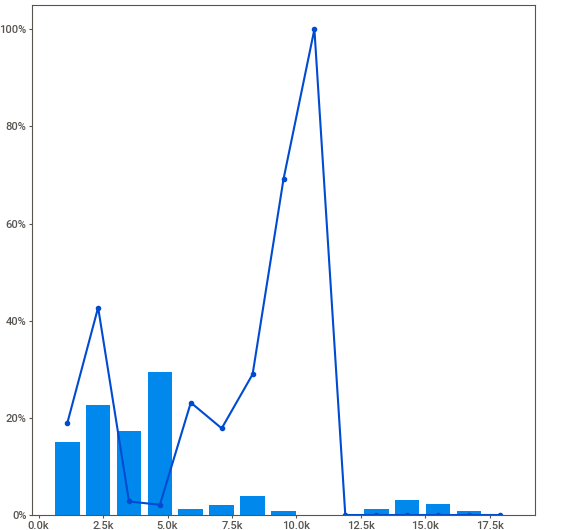
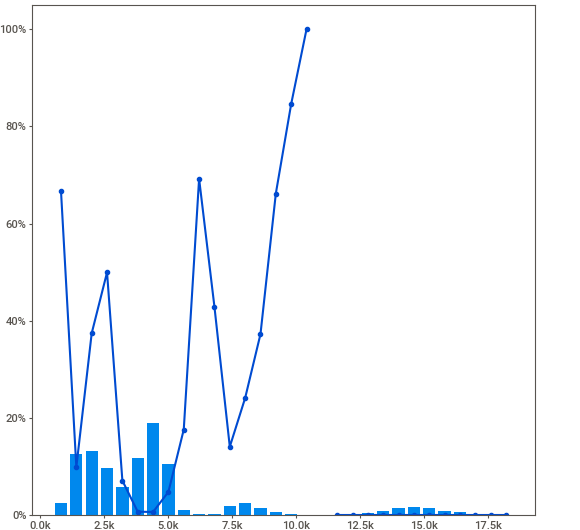
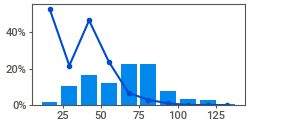
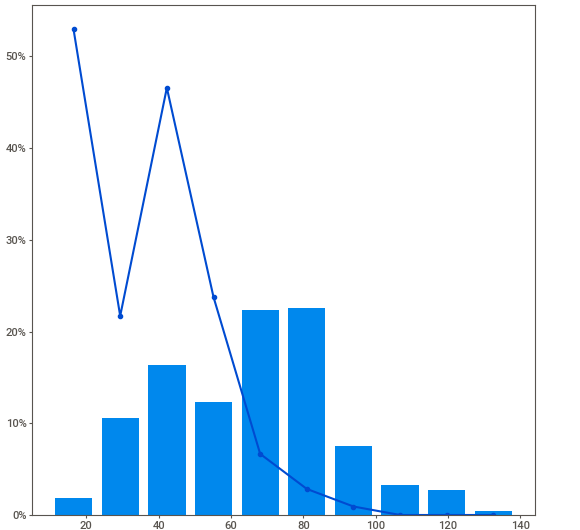
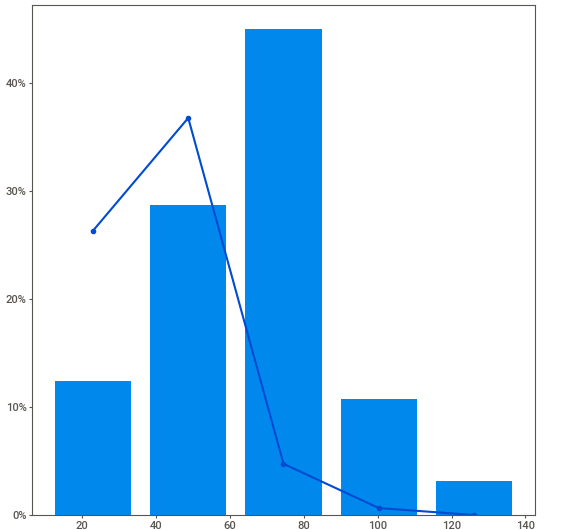
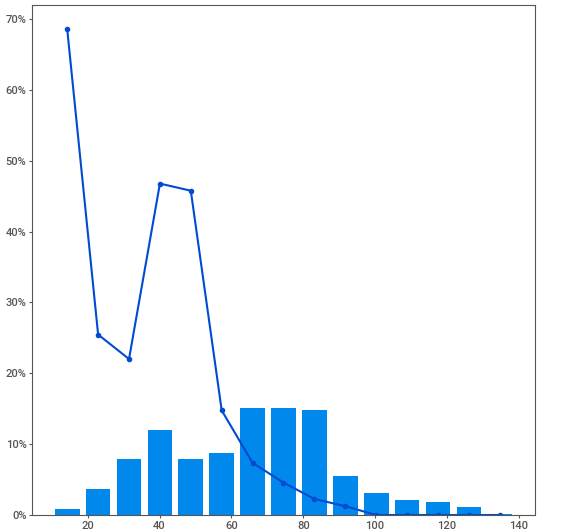
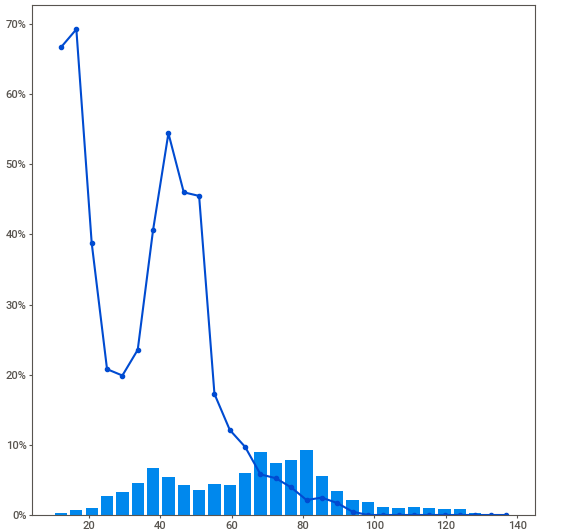
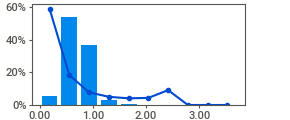
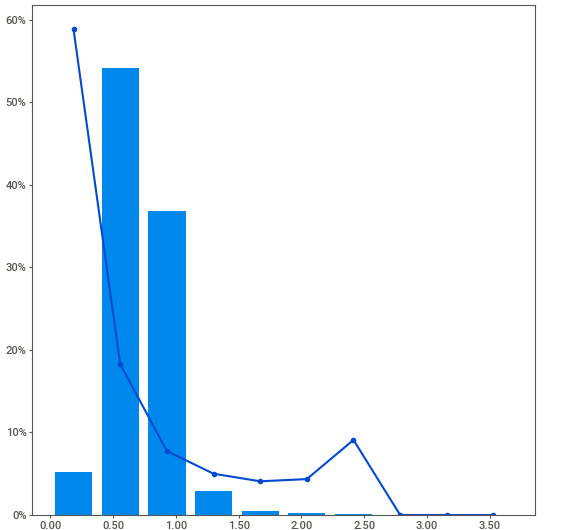
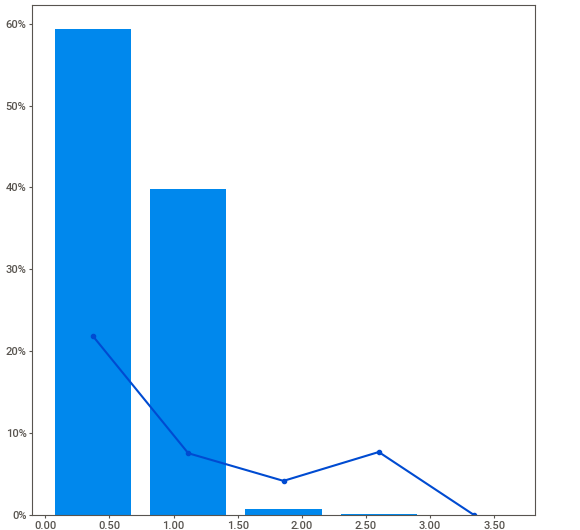
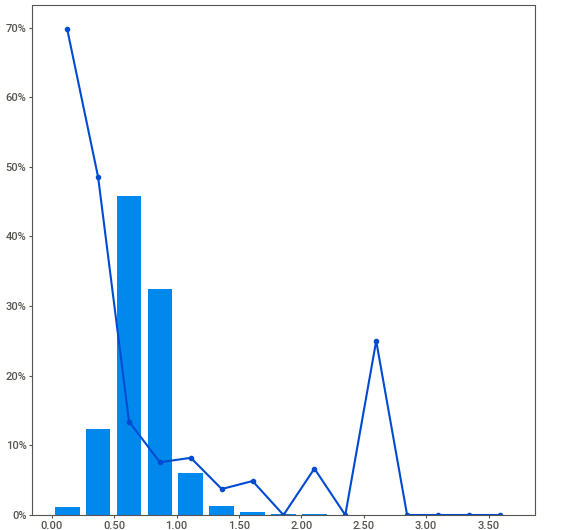
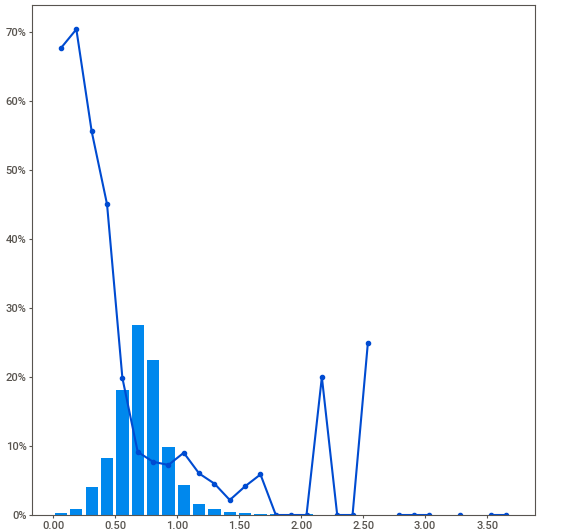
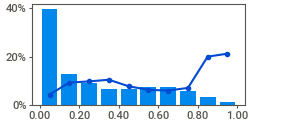
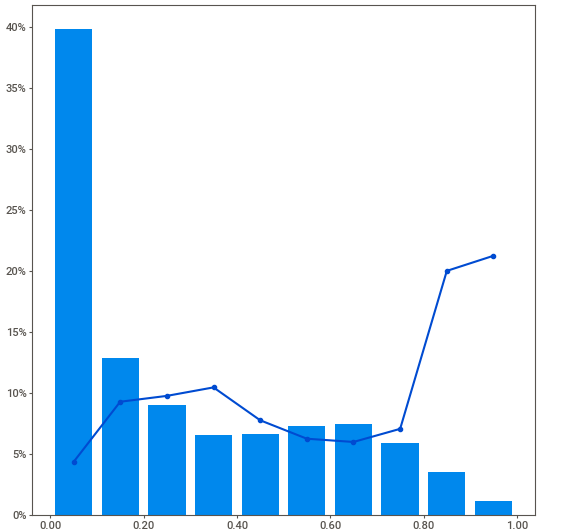
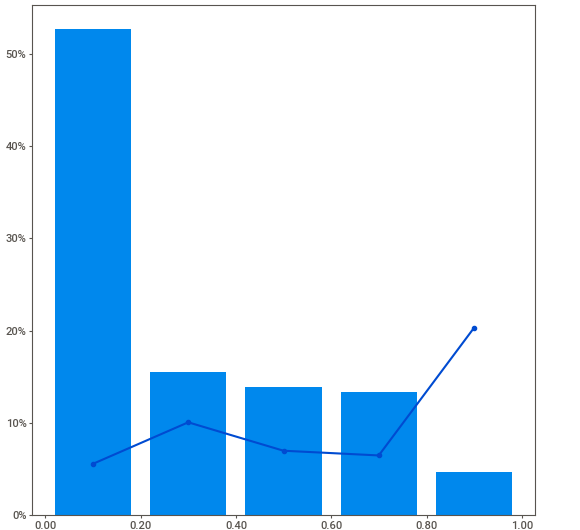
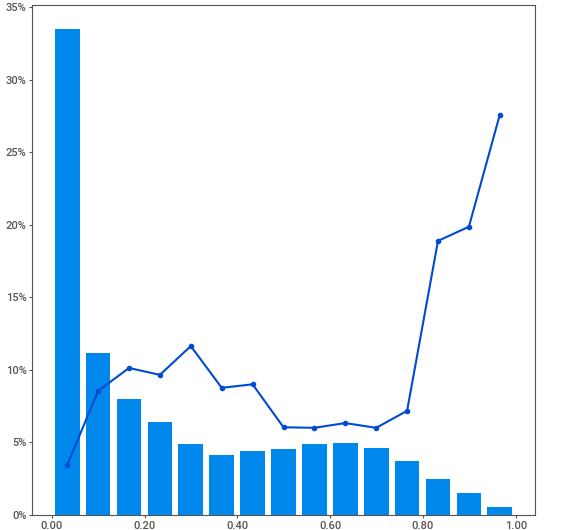
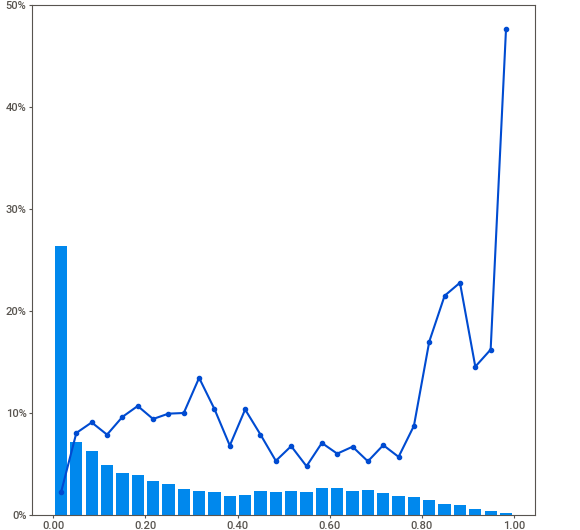
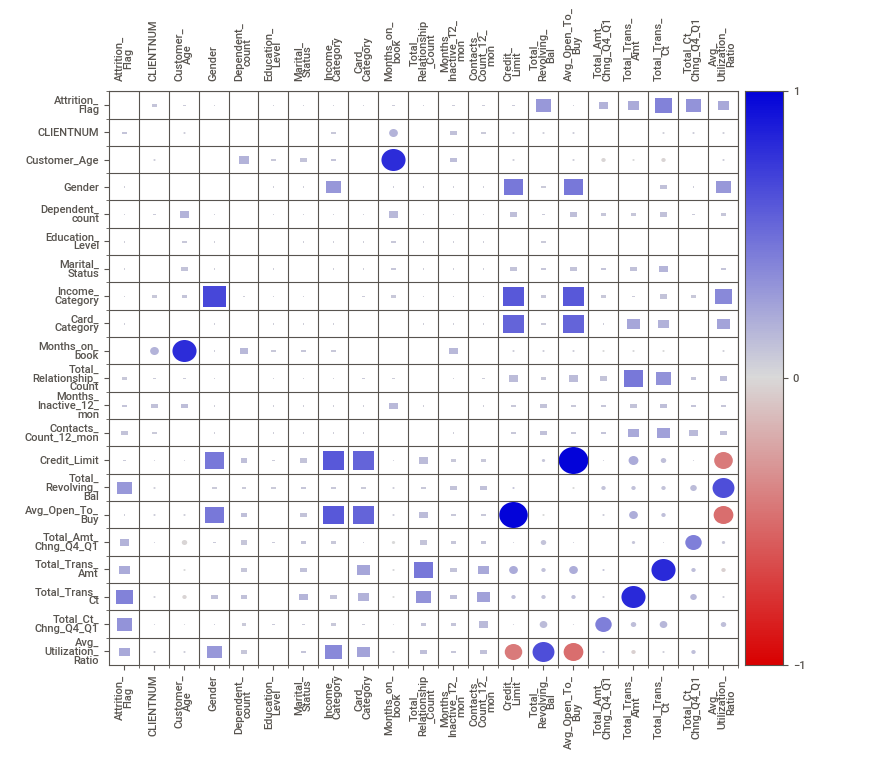
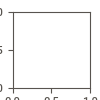

In [ ]:
import sweetviz as sv
eda= sv.analyze(source=df, target_feat="Attrition_Flag")
eda.show_notebook()

Attrition_Flag: A variavel alvo, apresenta um leve desbalanceamento, 16% dos clientes foi churned.

Customer_Age: A média é em 46,3 anos, o churned sobe até os 40 é é constante até os 60 e começa cair.

Gender: O sexo é 53/47, o churned fica 17 para Feminino e 15% para Masculino, praticamente iguais.

Dependent_count: No número de depente o que mais aparece é 3 com 27% em seguida de 2 com 26%. 0 depedentes há uma ocorrência de 9% e de 5 4%.

Education_level: Graduados e clientes com ensimo médio correspondem a 51% dos dados, e clientes com doutorado tem o churned em 21%.

Marital_Status: Casados e solteiros correspondem juntos a 85%, divorcidados a 7% e desconhecido também 7%.

Income_Category: A renda menos que 40k corresponde a 35%, e 40k até 60k corresponde a 15%, 53% da base ganha até 60k, 7% é desconhecido e 36% tem renda maior que 60k

Card_Category: 93% dos clientes possui o cartão Blue, 5% o Silver, Gold e Platinum tem 1% cada

Months_on_book: Referente ao periodo que o cliente está com banco. A média é de 35,9



Total_Relationship_Count: Referente a quantitdade de produtos detido pelo cliente, clientes com 1 e 2 produtos tem maior churned na base.

Months_Inactive_12_mon: 38% dos clientes ficaram inativos pelo menos 3 meses nos ultimos 12 meses.

Contacts_Count_12_mon:3 33% dos clientes que entraram em contato nos ultimos 12 meses, desses 20% se desligaram, os clientes que entraram em contato 4 vezes, 23% se desligaram, 5 vezes 34% se desligaram, e todos os clientes que entraram em contato 6 vezes nos ultimos 12 meses se desligaram.

Credit_Limit: O limite de credito tem o comportamento de cair o desligamento após o 10k e voltar a subir após o 25k.

Total Revolving Balance on the Credit Card: Credito rotativo tem maior desligamento em valores baixos.

Avg_Open_To_Buy: Limite de crédito, a curva de desligamento é estável em toda base

Total_Amt_Chng_Q4_Q1: Alteração no valor de transação(Q4 em relação a Q1): Quanto maior a alteração menor o desligamento na base










# Pré processamento - No pré processamento as variáveis categóricas serão transformadas em Dummy

In [7]:
#Drop da coluna com identificação dos clientes
df=df.drop(["CLIENTNUM"], axis=1)

In [10]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [14]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
variaveis_cat = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

df= pd.get_dummies(df, columns = variaveis_cat, drop_first = True)

In [16]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,...,1,0,1,0,0,0,0,0,0,0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,1,0,0,0,0,0,0,0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,...,0,0,0,0,0,1,0,0,0,0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,...,0,1,1,0,0,0,0,0,0,0


# Treino e Teste


In [99]:
from sklearn.model_selection import train_test_split
#Dividindo X e y

X = df.drop('Attrition_Flag', axis = 1)
y = df[['Attrition_Flag']]

In [100]:
#stratify=y para manter a proporção original de y
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.25,
                                     random_state=42,stratify=y)

#LazyClassifier - Modelo de base
#A Biblioteca Lazy é utilizada para rodar vários modelos rapidamente sem otimização de hiperparâmetros

In [ ]:
pip install lazypredict

In [1]:
from lazypredict.Supervised import LazyClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:24<00:00,  1.21it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.97,0.93,0.93,0.97,1.48
LGBMClassifier,0.97,0.93,0.93,0.97,0.46
AdaBoostClassifier,0.95,0.89,0.89,0.95,0.76
RandomForestClassifier,0.96,0.89,0.89,0.96,1.33
BaggingClassifier,0.95,0.89,0.89,0.95,0.57
DecisionTreeClassifier,0.93,0.87,0.87,0.93,0.15
NearestCentroid,0.80,0.78,0.78,0.82,0.05
ExtraTreesClassifier,0.92,0.78,0.78,0.91,0.90
SGDClassifier,0.90,0.77,0.77,0.90,0.14


In [51]:
#Será definida uma função com o LightGBM para o proximos testes serem mais rapidos e padronizados, a métrica de comparação será a acurácia balanceada
import lightgbm as
from sklearn.metrics import balanced_accuracy_score

def score_dataset(X_train, X_test, y_train, y_test):
    model = lgb.LGBMClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return balanced_accuracy_score(y_test, preds)

In [52]:
score_dataset(X_train, X_test, y_train, y_test)

0.9287717878306114

#O modelo base teve acurácia balanceada de 0,92

# PCA

##Principal component analysis ou simplesmente PCA é uma técnica de análise multivariada que consiste em estudar a estrutura de interdependência de um conjunto de variáveis observadas em um conjunto de dados. Essa técnica utiliza a covâriancia e variâncias dos dados. Pode ser utilizado para redução de dimensionalidade como vai ser usada aqui, mas pode ser usada para descrição e interpretação, obtenção de novas váriaveis, analíse de outiler, e diminuição de correlação em um conjunto de dados fortamente correlacionado.

##PCA funciona apenas com váriaveis númericas 
##PCA é sensível a escala, padronizar os dados é uma boa prática 

In [33]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
#Separando apenas as váriavies númericas
features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]

X_train_numerical=X_train.loc[:, features] 
X_test_numerical=X_test.loc[:, features] 

scaler = StandardScaler()

X_train_transform = scaler.fit_transform(X_train_numerical)
X_test_transform = scaler.transform(X_test_numerical)

In [38]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_transform)
X_train_pca .shape

(7595, 10)

# Foram selecionada 14 váriaveis e necessita de 10 componentes para ter 95% da variância explicada 

In [174]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_transform)
X_train_pca.shape

(7595, 5)

In [175]:
pca = PCA(n_components=5)
X_test_pca = pca.fit_transform(X_test_transform)
X_test_pca.shape

(2532, 5)

In [176]:
score_dataset(X_train_pca, X_test_pca, y_train, y_test)

0.7031686659921954

# Com 5 componentes tem se acurácia balanceada de 0,70

# PCA com variáveis categóricas
# Aqui os 5 componentes serão unidos as variáveis categoricas 

In [103]:
X_train=X_train.reset_index(drop=True)

In [124]:
X_test=X_test.reset_index(drop=True)

In [141]:
X_train

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,52,3,44,1,2,1,23889.00,603,23286.00,0.79,...,0,0,0,1,0,0,0,0,0,0
1,37,3,36,3,2,3,6077.00,1397,4680.00,0.83,...,1,0,0,0,0,1,0,0,0,0
2,45,3,32,2,5,1,2948.00,968,1980.00,0.95,...,0,0,0,0,0,1,0,0,0,0
3,43,3,30,3,3,1,4075.00,2189,1886.00,0.69,...,1,0,0,0,0,1,0,0,0,0
4,44,5,37,1,2,4,1491.00,0,1491.00,0.55,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,47,5,40,5,1,3,2950.00,2000,950.00,0.88,...,0,0,0,0,0,1,0,0,0,0
7591,46,4,30,3,1,3,5869.00,0,5869.00,0.85,...,0,0,0,0,0,0,1,0,0,0
7592,52,1,35,1,3,3,1959.00,1022,937.00,0.78,...,0,0,0,0,0,1,0,0,0,0
7593,60,1,36,1,3,4,3316.00,0,3316.00,0.37,...,0,0,0,0,0,1,0,0,0,0


In [177]:
X_train_pca = pd.DataFrame(X_train_pca)

In [178]:
X_test_pca = pd.DataFrame(X_test_pca)

In [179]:
X_train_pca

,0,1,2,3,4
0,4.01,2.30,2.29,-0.27,0.84
1,-0.13,0.39,-0.89,-0.28,-0.16
2,0.00,1.53,0.18,-1.34,0.75
3,-1.01,1.44,-0.35,-0.02,-0.84
4,0.00,-1.24,-0.94,-2.38,0.28
...,...,...,...,...,...
7590,-1.31,1.33,0.14,1.00,-0.67
7591,0.92,0.47,-0.87,-0.54,1.50
7592,-0.71,1.15,1.03,-0.69,0.65
7593,-0.48,-3.02,0.61,-3.09,-0.26


In [180]:
X_train_final=pd.concat([X_train, X_train_pca],axis=1)

In [181]:
X_test_final=pd.concat([X_test, X_test_pca],axis=1)

In [182]:
X_train_final

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,0,1,2,3,4
0,52,3,44,1,2,1,23889.00,603,23286.00,0.79,...,0,0,0,0,0,4.01,2.30,2.29,-0.27,0.84
1,37,3,36,3,2,3,6077.00,1397,4680.00,0.83,...,1,0,0,0,0,-0.13,0.39,-0.89,-0.28,-0.16
2,45,3,32,2,5,1,2948.00,968,1980.00,0.95,...,1,0,0,0,0,0.00,1.53,0.18,-1.34,0.75
3,43,3,30,3,3,1,4075.00,2189,1886.00,0.69,...,1,0,0,0,0,-1.01,1.44,-0.35,-0.02,-0.84
4,44,5,37,1,2,4,1491.00,0,1491.00,0.55,...,1,0,0,0,0,0.00,-1.24,-0.94,-2.38,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,47,5,40,5,1,3,2950.00,2000,950.00,0.88,...,1,0,0,0,0,-1.31,1.33,0.14,1.00,-0.67
7591,46,4,30,3,1,3,5869.00,0,5869.00,0.85,...,0,1,0,0,0,0.92,0.47,-0.87,-0.54,1.50
7592,52,1,35,1,3,3,1959.00,1022,937.00,0.78,...,1,0,0,0,0,-0.71,1.15,1.03,-0.69,0.65
7593,60,1,36,1,3,4,3316.00,0,3316.00,0.37,...,1,0,0,0,0,-0.48,-3.02,0.61,-3.09,-0.26


In [183]:
X_train_final=X_train_final.drop(columns=features)
X_test_final=X_test_final.drop(columns=features)

In [184]:
X_train_final


,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,...,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,0,1,2,3,4
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,4.01,2.30,2.29,-0.27,0.84
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,-0.13,0.39,-0.89,-0.28,-0.16
2,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0.00,1.53,0.18,-1.34,0.75
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,-1.01,1.44,-0.35,-0.02,-0.84
4,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0.00,-1.24,-0.94,-2.38,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,-1.31,1.33,0.14,1.00,-0.67
7591,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0.92,0.47,-0.87,-0.54,1.50
7592,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,-0.71,1.15,1.03,-0.69,0.65
7593,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,-0.48,-3.02,0.61,-3.09,-0.26


In [185]:
score_dataset(X_train_final, X_test_final, y_train, y_test)

0.7279739846798671

# 5 componentes mais as variáveis categoricas originais dão o total de 23, em comparação o X_train original tem 32 colunas


#FAMD - PCA tem a limitação de não ser lidar bem com dados categóricos. A técnica FAMD pode ser utilizada com dados númericos e categóricos

##A FAMD faz a análise com uma combinação das técnicas PCA e MCA. MCA, Multiple correspondence analysis, é adequada para dados categóricos.
##A Biblioteca prince traz o FAMD 

In [188]:
pip install prince

In [193]:
#irá ser carregado e feitos os ajustes de volta no dataset para utilizar com a Biblioteca Prince
df2=pd.read_csv('/content/BankChurners.csv')

In [195]:
df2=df2.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1)

In [196]:
df2['Attrition_Flag']= df2['Attrition_Flag'].replace({'Attrited Customer':1,'Existing Customer':0})

In [199]:
df2=df2.drop(["CLIENTNUM"], axis=1)

In [201]:
df2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00,1851,2152.00,0.70,15476,117,0.86,0.46
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00,2186,2091.00,0.80,8764,69,0.68,0.51
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00,0,5409.00,0.82,10291,60,0.82,0.00
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.00,0,5281.00,0.54,8395,62,0.72,0.00


In [202]:
#Dividindo X e y

X = df2.drop('Attrition_Flag', axis = 1)
y = df2[['Attrition_Flag']]

In [203]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.25,
                                     random_state=42,stratify=y)

In [229]:
#Chamando criando a FAMD
from prince import FAMD
famd = FAMD(n_components =10, n_iter = 3, random_state = 101)

In [230]:
X_train_famd=famd.fit(X_train)
X_test_famd=famd.transform(X_test)

In [231]:
X_train_famd=famd.transform(X_train)

In [232]:
X_test_famd

,0,1,2,3,4,5,6,7,8,9
6566,-1.15,0.87,-0.23,1.13,0.36,-0.05,0.63,-0.18,-1.12,0.68
2939,-0.73,-0.07,0.46,-0.97,0.40,0.69,-0.66,-0.01,0.81,-0.17
5507,-0.72,-0.58,0.32,-2.00,-0.57,-0.10,0.00,-1.00,-0.05,-0.08
6030,-0.65,0.07,0.18,-1.04,0.57,0.74,0.19,-0.38,0.23,-0.12
3179,-1.22,0.69,-0.67,1.09,0.16,-0.55,1.09,0.30,-0.19,-0.44
...,...,...,...,...,...,...,...,...,...,...
8593,-1.15,1.11,0.40,0.01,-0.33,-0.29,-0.02,-0.65,0.11,0.50
5183,0.29,-0.83,1.90,-0.12,-0.58,0.51,1.22,0.37,-0.52,-0.54
9138,0.95,1.51,0.05,0.91,-1.00,0.24,-0.80,0.42,-0.36,0.19
6346,-1.16,0.89,-0.20,0.12,-0.26,-0.52,-0.99,-0.67,0.41,-0.88


In [233]:
X_train_famd

,0,1,2,3,4,5,6,7,8,9
9524,2.07,1.73,1.16,0.45,-0.49,1.47,-0.97,0.05,-0.43,0.10
1586,-0.63,0.50,-0.44,-0.54,0.09,-0.33,0.55,0.16,-0.38,0.19
8615,-0.79,1.08,0.16,-0.53,-0.24,0.30,-0.82,0.10,1.23,-0.01
4667,-1.08,0.88,-0.22,0.11,-0.16,-0.64,0.50,-0.50,-0.30,0.44
4887,-0.61,-0.22,-0.28,-1.85,-0.52,0.02,0.05,-0.10,-0.39,0.38
...,...,...,...,...,...,...,...,...,...,...
3809,-1.24,0.56,0.00,0.73,0.34,-0.69,-0.72,-0.69,0.41,-0.09
6147,-0.06,0.57,-0.41,-0.94,0.99,0.54,-1.14,-0.06,0.11,-0.94
8858,-1.06,0.73,0.66,-0.05,-0.06,0.22,-0.41,1.02,1.08,-0.68
5323,-0.21,-1.67,0.68,-1.52,-1.33,0.16,-0.41,0.92,1.00,0.38


In [234]:
score_dataset(X_train_famd, X_test_famd, y_train, y_test)

0.7433970226911404

## Com 10 componentes levou a acurácia balanceada foi de 0,74

# Considerações finais 

##PCA e FAMD são tecnicas que podem ser utilizada para redução de dimensionalidade. No conjunto de dados a técnica produziu bons resultados considerando a quantidade de componentes usada, mas não superou utilizar todas as váriavies na comparação da acurácia balanceada.
## Abaixo terão links utéis e que foram utilizados nesse projeto 

https://www.kaggle.com/code/ryanholbrook/principal-component-analysis

https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210

https://personal.utdallas.edu/~herve/Abdi-MCA2007-pretty.pdf

https://pypi.org/project/prince/

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html